In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('data.csv')
#df.drop(columns=['Unix Timestamp','Symbol'],inplace=True)
df.dropna(inplace=True) #drop nulls



In [7]:
df.head(10000).to_csv('data.csv')

In [28]:

df['Change']=df.apply(lambda row: (row.Close-row.Open)/row.Close*100, axis=1)
df['Dates'] = pd.to_datetime(df['Timestamp'], unit='s')
df.head(10)

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Change,Dates
0,0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.000000,2011-12-31 07:52:00
1,478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.000000,2011-12-31 15:50:00
2,547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,1.531729,2011-12-31 16:59:00
3,548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.000000,2011-12-31 17:00:00
4,1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.000000,2012-01-01 04:16:00
5,1896,1325431680,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000,0.000000,2012-01-01 15:28:00
6,2333,1325457900,5.00,5.00,5.00,5.00,10.100000,50.500000,5.000000,0.000000,2012-01-01 22:45:00
7,3612,1325534640,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000,0.000000,2012-01-02 20:04:00
8,4553,1325591100,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000,0.000000,2012-01-03 11:45:00
9,4710,1325600520,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000,0.000000,2012-01-03 14:22:00


In [29]:
#df.drop(df[df['Change'] < 100].index, inplace = True)
df.dropna(inplace=True) #drop nulls
df.head(10)
df.nsmallest(10, 'Change')

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Change,Dates
60842,672665,1365677820,140.00,140.00,75.00,75.00,15.606579,2151.477433,137.857079,-86.666667,2013-04-11 10:57:00
59977,671709,1365620460,172.00,172.00,135.00,135.00,76.449433,11786.881251,154.178792,-27.407407,2013-04-10 19:01:00
59894,671626,1365615480,174.99,174.99,150.00,150.00,16.151355,2667.140286,165.134147,-16.660000,2013-04-10 17:38:00
61694,673645,1365736620,87.00,87.00,74.00,75.00,23.368706,1813.041241,77.584154,-16.000000,2013-04-12 03:17:00
61526,673450,1365724920,81.02,81.02,68.32,70.00,208.781890,15444.675334,73.975168,-15.742857,2013-04-12 00:02:00
59928,671660,1365617520,128.00,128.00,110.97,111.12,235.103393,29604.699384,125.922042,-15.190785,2013-04-10 18:12:00
60115,671847,1365628740,188.00,190.00,141.40,163.21,69.832015,12277.455352,175.814135,-15.189020,2013-04-10 21:19:00
61499,673418,1365723000,88.66,88.66,77.03,77.03,84.010796,7232.198177,86.086533,-15.098014,2013-04-11 23:30:00
59976,671708,1365620400,184.00,184.00,160.00,160.00,96.397353,16546.022008,171.643946,-15.000000,2013-04-10 19:00:00
61695,673646,1365736680,86.00,86.00,75.00,75.01,3.701188,301.855407,81.556352,-14.651380,2013-04-12 03:18:00


In [30]:
df.drop(df[df['Change'] < -50].index, inplace = True) #filter false datapoints
df.nsmallest(10, 'Change')

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Change,Dates
59977,671709,1365620460,172.00,172.00,135.00,135.00,76.449433,11786.881251,154.178792,-27.407407,2013-04-10 19:01:00
59894,671626,1365615480,174.99,174.99,150.00,150.00,16.151355,2667.140286,165.134147,-16.660000,2013-04-10 17:38:00
61694,673645,1365736620,87.00,87.00,74.00,75.00,23.368706,1813.041241,77.584154,-16.000000,2013-04-12 03:17:00
61526,673450,1365724920,81.02,81.02,68.32,70.00,208.781890,15444.675334,73.975168,-15.742857,2013-04-12 00:02:00
59928,671660,1365617520,128.00,128.00,110.97,111.12,235.103393,29604.699384,125.922042,-15.190785,2013-04-10 18:12:00
60115,671847,1365628740,188.00,190.00,141.40,163.21,69.832015,12277.455352,175.814135,-15.189020,2013-04-10 21:19:00
61499,673418,1365723000,88.66,88.66,77.03,77.03,84.010796,7232.198177,86.086533,-15.098014,2013-04-11 23:30:00
59976,671708,1365620400,184.00,184.00,160.00,160.00,96.397353,16546.022008,171.643946,-15.000000,2013-04-10 19:00:00
61695,673646,1365736680,86.00,86.00,75.00,75.01,3.701188,301.855407,81.556352,-14.651380,2013-04-12 03:18:00
61115,673019,1365699060,102.90,102.90,90.00,90.00,69.549532,6764.717088,97.264739,-14.333333,2013-04-11 16:51:00


In [31]:
df.shape

(499999, 11)

Text(0, 0.5, '$ Price')

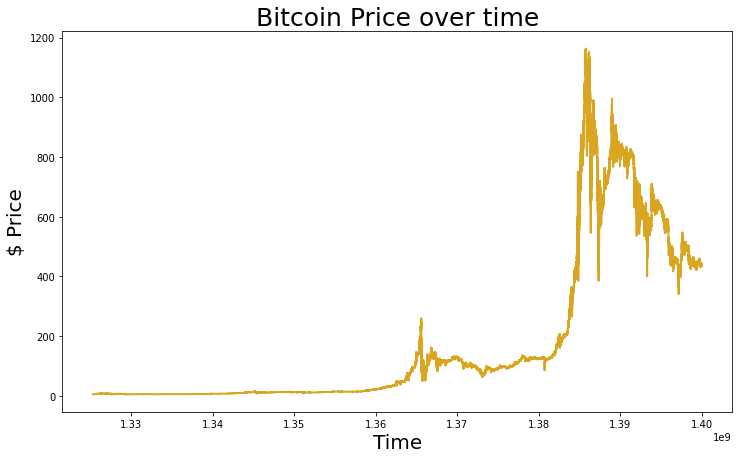

In [32]:
plt.figure(figsize = (12, 7)).patch.set_facecolor('white')
plt.plot(df["Timestamp"], df["Open"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

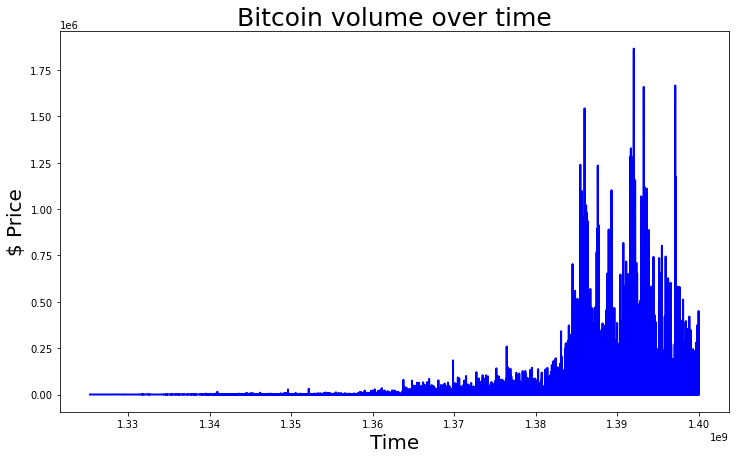

In [33]:
plt.figure(figsize = (12, 7)).patch.set_facecolor('white')
plt.plot(df["Timestamp"], df["Volume_(Currency)"], color='blue', lw=2)
plt.title("Bitcoin volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

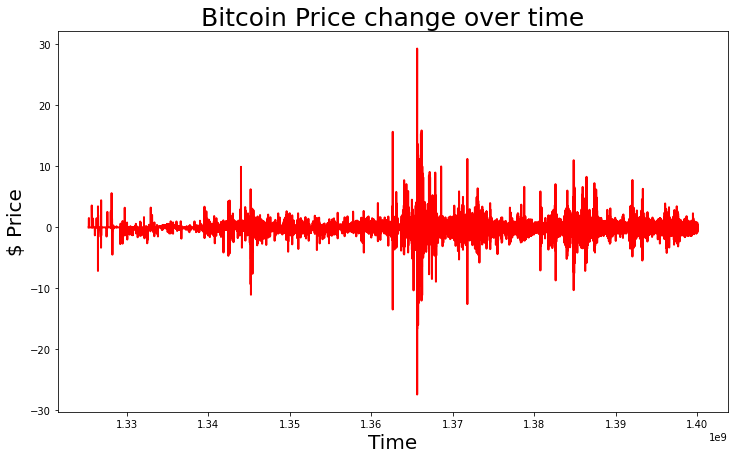

In [34]:
plt.figure(figsize = (12, 7)).patch.set_facecolor('white')
plt.plot(df["Timestamp"], df["Change"], color='red', lw=2)
plt.title("Bitcoin Price change over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [35]:
required_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
output_label = 'Close'

In [36]:
x_train, x_test, y_train, y_test = train_test_split(
df[required_features],
df[output_label],
test_size = 0.3
)

In [37]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
model.score(x_test, y_test)

0.9999898706812764

Text(0, 0.5, '$ Price')

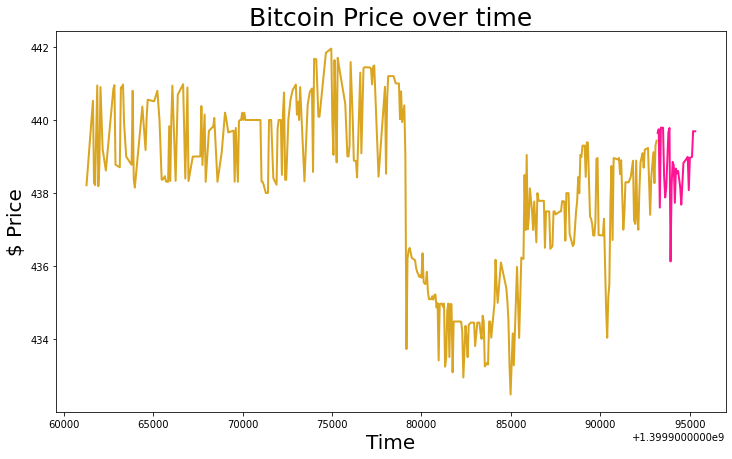

In [39]:
future_set = df.shift(periods=30).tail(30)
prediction = model.predict(future_set[required_features])

plt.figure(figsize = (12, 7)).patch.set_facecolor('white')
plt.plot(df["Timestamp"][-400:-60], df["Weighted_Price"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Timestamp"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)